In [1]:
%load_ext lab_black

In [2]:
import sys
import os

# Add the parent folder to path to be able to easily access other agents
sys.path.append(os.path.abspath(os.path.join("..")))
# print("\n".join(sys.path))

In [3]:
%load_ext autoreload
%autoreload 2

In [5]:
from luxai_s2.env import LuxAI_S2
import matplotlib.pyplot as plt
import numpy as np

# Import agents to work with
from agent_v5.agent import Agent

INFO:root:Starting Log


In [6]:
# def animate(imgs, _return=True):
#     """
#     Combines images to make a video that can be rendered in notebook
#     Returns:
#         video generated from images
#     """
#     # using cv2 to generate videos as moviepy doesn't work on kaggle notebooks
#     import cv2
#     import os
#     import string
#     import random

#     vid_dir = "_videos"
#     os.makedirs(vid_dir, exist_ok=True)

#     video_name = (
#         "".join(random.choice(string.ascii_letters) for i in range(18)) + ".webm"
#     )
#     video_name = os.path.join(vid_dir, video_name)
#     height, width, layers = imgs[0].shape
#     fourcc = cv2.VideoWriter_fourcc(*"VP90")
#     video = cv2.VideoWriter(video_name, fourcc, 10, (width, height))

#     for img in imgs:
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         video.write(img)
#     video.release()
#     if _return:
#         from IPython.display import Video

#         return Video(video_name)


# def interact(env, agents, steps):
#     """
#     Plays the agents against each other for the first <steps> of the game
#     Returns:
#        a video of game"""
#     # reset our env
#     obs = env.reset(seed=41)
#     np.random.seed(0)
#     imgs = []
#     step = 0
#     # Note that as the environment has two phases, we also keep track a value called
#     # `real_env_steps` in the environment state. The first phase ends once `real_env_steps` is 0 and used below

#     # iterate until phase 1 ends
#     while env.state.real_env_steps < 0:
#         if step >= steps:
#             break
#         actions = {}
#         for player in env.agents:
#             o = obs[player]
#             a = agents[player].early_setup(step, o)
#             actions[player] = a
#         step += 1
#         obs, rewards, dones, infos = env.step(actions)
#         imgs += [env.render("rgb_array", width=640, height=640)]
#     done = False
#     while not done:
#         if step >= steps:
#             break
#         actions = {}
#         for player in env.agents:
#             o = obs[player]
#             a = agents[player].act(step, o)
#             actions[player] = a
#         step += 1
#         obs, rewards, dones, infos = env.step(actions)
#         imgs += [env.render("rgb_array", width=640, height=640)]
#         done = dones["player_0"] and dones["player_1"]
#     return animate(imgs)

# Make Video of Agents playing

In [7]:
# env = LuxAI_S2()  # create the environment object
# agents = {player: Agent(player, env.state.env_cfg) for player in env.possible_agents}
# interact(env, agents, 25)

# Working with env one step at a time

In [8]:
from util import show_env

env = LuxAI_S2()

## Early Setup Phase

INFO:root:Starting Log
INFO:root:initializing agent for player player_0
INFO:root:initializing agent for player player_1
INFO:root:player_0 Beginning of step update for step 0
INFO:root:player_0 Early setup action {'faction': 'TheBuilders', 'bid': 0}
INFO:root:player_1 Beginning of step update for step 0
INFO:root:player_1 Early setup action {'faction': 'TheBuilders', 'bid': 0}
INFO:root:player_0 Beginning of step update for step 1
INFO:root:player_0 Early setup action {'spawn': (28, 16), 'metal': 150, 'water': 150}
INFO:root:player_1 Beginning of step update for step 1
INFO:root:player_1 Early setup action {}
INFO:root:player_0 Beginning of step update for step 2
INFO:root:player_0 Early setup action {}
INFO:root:player_1 Beginning of step update for step 2
INFO:root:player_1 Early setup action {'spawn': (4, 9), 'metal': 150, 'water': 150}
INFO:root:player_0 Beginning of step update for step 3
INFO:root:player_0 Early setup action {'spawn': (12, 2), 'metal': 150, 'water': 150}
INFO:ro

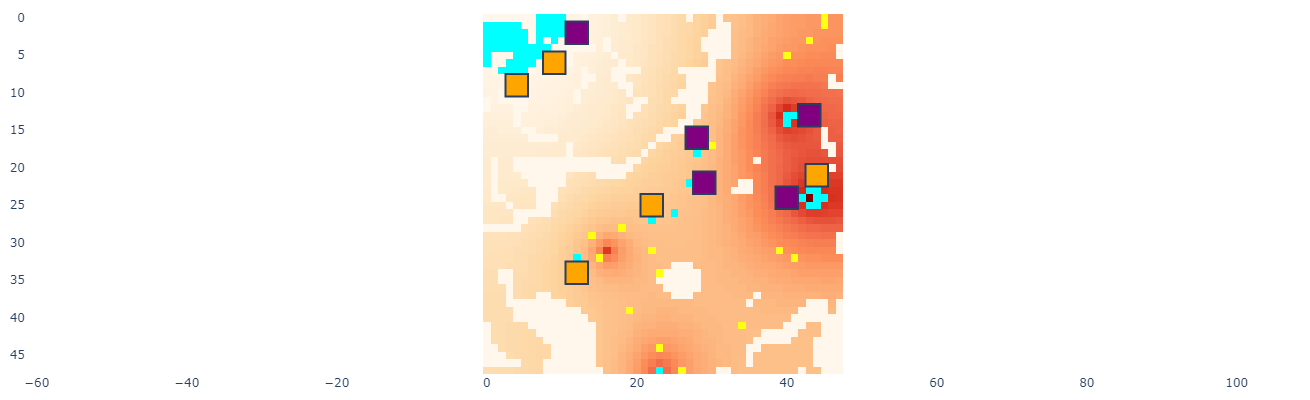

In [73]:
# Run the early_setup phase
agents = {player: Agent(player, env.state.env_cfg) for player in env.possible_agents}
agent = agents["player_0"]
# obs = env.reset(seed=42)  # resets an environment with a seed
obs = env.reset(seed=178220973)  # resets an environment with a seed
step = 0

while env.state.real_env_steps < 0:
    actions = {}
    for player in env.agents:
        o = obs[player]
        acts = agents[player].early_setup(step, o)
        actions[player] = acts
    step += 1
    obs, rewards, dones, infos = env.step(actions)
# plt.imshow(env.render("rgb_array", width=640, height=640))
show_env(env)

## Run one step at a time

In [74]:
# Advance to later state
while env.state.real_env_steps < 5:
    print(f"Carrying out real step {step}, env step {env.state.real_env_steps}")
    actions = {player: agent.act(step, obs[player]) for player, agent in agents.items()}
    all_actions[step] = actions  # Just for debugging
    step += 1
    obs, rewards, dones, infos = env.step(actions)

INFO:root:player_0 Beginning of step update for step 11
INFO:root:factory_0 building Heavy
INFO:root:factory_2 building Heavy
INFO:root:factory_4 building Heavy
INFO:root:factory_6 building Heavy
INFO:root:factory_8 building Heavy
INFO:root:player_0 player_0 Factory actions: {'factory_0': 1, 'factory_2': 1, 'factory_4': 1, 'factory_6': 1, 'factory_8': 1}
INFO:root:player_1 Beginning of step update for step 11
INFO:root:factory_1 building Heavy
INFO:root:factory_3 building Heavy
INFO:root:factory_5 building Heavy
INFO:root:factory_7 building Heavy
INFO:root:factory_9 building Heavy
INFO:root:player_1 player_1 Factory actions: {'factory_1': 1, 'factory_3': 1, 'factory_5': 1, 'factory_7': 1, 'factory_9': 1}
INFO:root:player_0 Beginning of step update for step 12
INFO:root:player_0 unit_10 assigned to mine_ice (for factory_0)
INFO:root:player_0 unit_11 assigned to mine_ice (for factory_2)
INFO:root:player_0 unit_12 assigned to mine_ice (for factory_4)
INFO:root:player_0 unit_13 assigned to

Carrying out real step 11, env step 0
dict_keys(['factory_0', 'factory_2', 'factory_4', 'factory_6', 'factory_8'])
dict_keys(['factory_1', 'factory_3', 'factory_5', 'factory_7', 'factory_9'])
Carrying out real step 12, env step 1
dict_keys(['factory_0', 'factory_2', 'factory_4', 'factory_6', 'factory_8'])
dict_keys(['factory_1', 'factory_3', 'factory_5', 'factory_7', 'factory_9'])


INFO:root:player_1 unit_15 assigned to mine_ice (for factory_1)
INFO:root:player_1 unit_16 assigned to mine_ice (for factory_3)
INFO:root:player_1 unit_17 assigned to mine_ice (for factory_5)
INFO:root:player_1 unit_18 assigned to mine_ice (for factory_7)
INFO:root:player_1 unit_19 assigned to mine_ice (for factory_9)
INFO:root:player_1 player_1 Factory actions: {}
INFO:root:player_0 Beginning of step update for step 13
INFO:root:player_0 player_0 Factory actions: {}
INFO:root:player_1 Beginning of step update for step 13
INFO:root:player_1 player_1 Factory actions: {}
INFO:root:player_0 Beginning of step update for step 14
INFO:root:player_0 player_0 Factory actions: {}
INFO:root:player_1 Beginning of step update for step 14
INFO:root:player_1 player_1 Factory actions: {}
INFO:root:player_0 Beginning of step update for step 15
INFO:root:player_0 player_0 Factory actions: {}
INFO:root:player_1 Beginning of step update for step 15
INFO:root:player_1 player_1 Factory actions: {}


Carrying out real step 13, env step 2
dict_keys(['factory_0', 'factory_2', 'factory_4', 'factory_6', 'factory_8'])
dict_keys(['factory_1', 'factory_3', 'factory_5', 'factory_7', 'factory_9'])
Carrying out real step 14, env step 3
dict_keys(['factory_0', 'factory_2', 'factory_4', 'factory_6', 'factory_8'])
dict_keys(['factory_1', 'factory_3', 'factory_5', 'factory_7', 'factory_9'])
Carrying out real step 15, env step 4
dict_keys(['factory_0', 'factory_2', 'factory_4', 'factory_6', 'factory_8'])
dict_keys(['factory_1', 'factory_3', 'factory_5', 'factory_7', 'factory_9'])


In [75]:
# Kill a specific factory
env.state.factories["player_0"]["factory_0"].cargo.water = 0

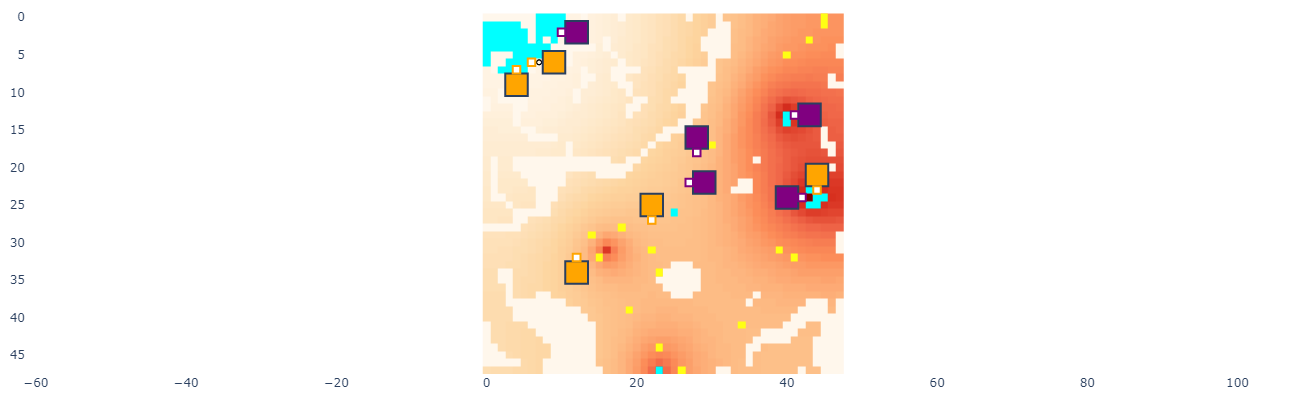

In [76]:
show_env(env)

INFO:root:player_0 Beginning of step update for step 26
INFO:root:player_0 unit_10 has no factory. Doing nothing
INFO:root:player_0 player_0 Factory actions: {}
INFO:root:player_1 Beginning of step update for step 26
INFO:root:player_1 player_1 Factory actions: {}


Carrying out real step 26, env step 15
dict_keys(['factory_2', 'factory_4', 'factory_6', 'factory_8'])
dict_keys(['factory_1', 'factory_3', 'factory_5', 'factory_7', 'factory_9'])


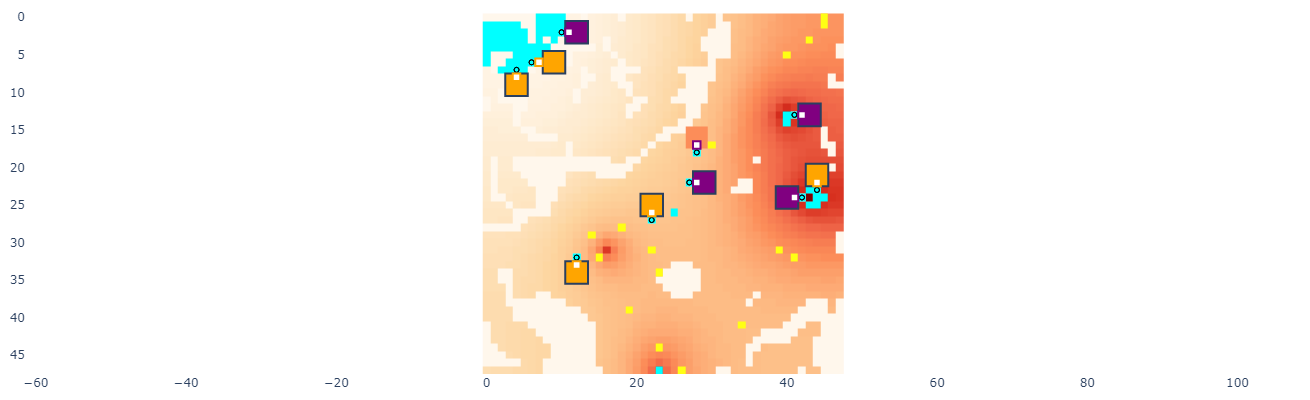

In [89]:
# Step one at a time
print(f"Carrying out real step {step}, env step {env.state.real_env_steps}")
actions = {player: agent.act(step, obs[player]) for player, agent in agents.items()}
step += 1
obs, rewards, dones, infos = env.step(actions)

show_env(env)

In [78]:
a = env.get_state().units["player_0"]["unit_11"]
t = a.action_queue[-1]

In [79]:
t.state_dict()

array([0, 4, 0, 0, 1, 1])

In [86]:
game_state = agent.master.game_state

In [108]:
import pandas as pd
from factory_manager import FactoryManager
from util import manhattan, nearest_non_zero

In [255]:
df = FactoryManager.place_factory(game_state, agent.player)
df

{'spawn': (32, 11), 'metal': 150, 'water': 150}

# Development Below Here

In [237]:
raise Exception('Below here is for development')

Exception: Below here is for development

## Thinking about how to value areas on map based on rubble

In [238]:
# rubble = game_state.board.rubble[35:45, 35:43]
rubble = game_state.board.rubble
rubble

array([[39, 39, 40, ..., 55, 55, 55],
       [39, 39, 40, ...,  0, 55, 55],
       [39, 39, 40, ..., 55,  0, 55],
       ...,
       [ 0,  0,  0, ...,  1,  0,  0],
       [24, 25, 25, ...,  1,  0,  0],
       [ 0, 25, 25, ...,  1,  0,  0]])

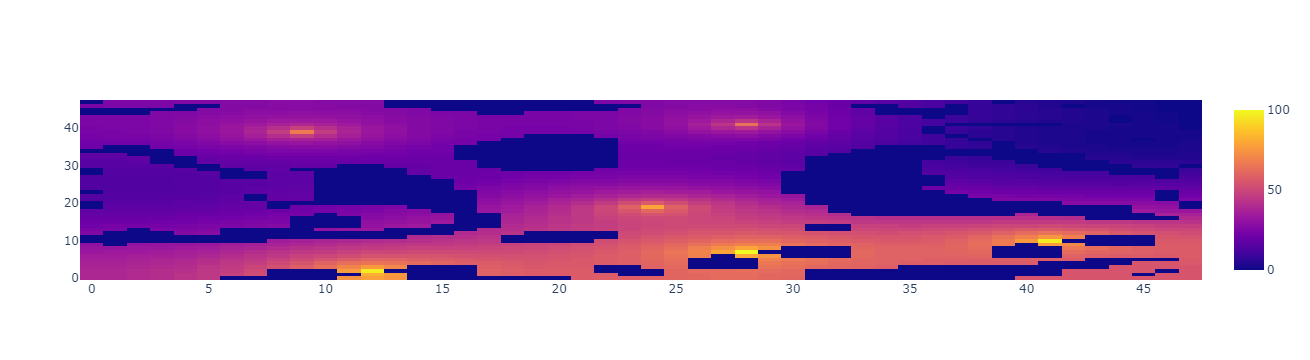

In [239]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Heatmap(z=rubble))
fig.show()

### Value based on connected zeros

In [244]:
from plotly.subplots import make_subplots

from util import count_connected_values, convolve_array_kernel, factory_map_kernel

count_arr = count_connected_values(rubble, value=0)
print(count_arr)

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  1  0]
 ...
 [10 10 10 ...  0 11 11]
 [ 0  0  0 ...  0 11 11]
 [ 1  0  0 ...  0 11 11]]


^ That gives how many connected zeros at any point

Let's evaluate the value based on a convolution (where the middle is blanked out by the factory placement)

In [245]:
factory_map_kernel(2, dist_multiplier=0.5)

array([[0.125, 0.25 , 0.5  , 0.5  , 0.5  , 0.25 , 0.125],
       [0.25 , 0.5  , 1.   , 1.   , 1.   , 0.5  , 0.25 ],
       [0.5  , 1.   , 0.   , 0.   , 0.   , 1.   , 0.5  ],
       [0.5  , 1.   , 0.   , 0.   , 0.   , 1.   , 0.5  ],
       [0.5  , 1.   , 0.   , 0.   , 0.   , 1.   , 0.5  ],
       [0.25 , 0.5  , 1.   , 1.   , 1.   , 0.5  , 0.25 ],
       [0.125, 0.25 , 0.5  , 0.5  , 0.5  , 0.25 , 0.125]])

### All in one

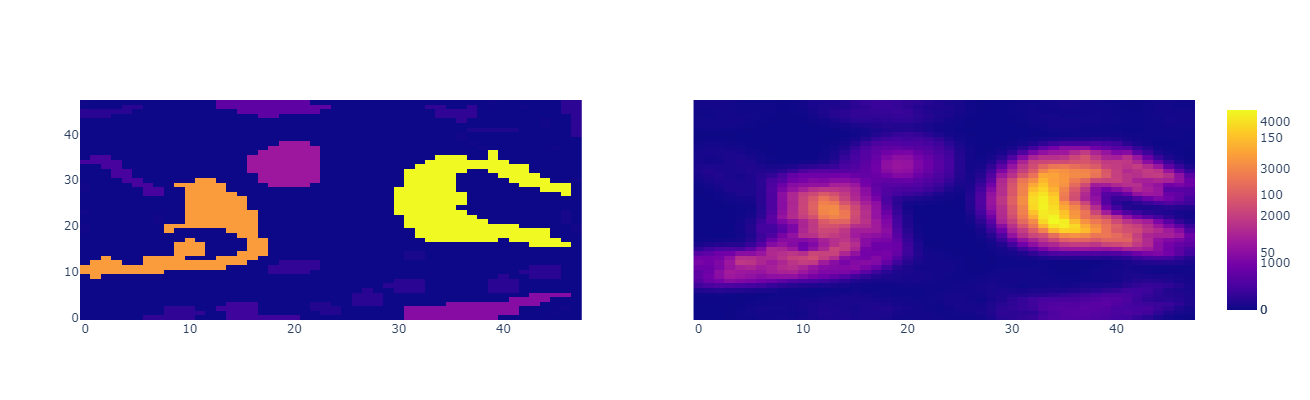

In [250]:
rubble = game_state.board.rubble
count_arr = count_connected_values(rubble, value=0)
factory_map_kernel(2, dist_multiplier=0.5)
kernel = factory_map_kernel(3, dist_multiplier=0.5)

conv_count_arr = convolve_array_kernel(count_arr, kernel)

fig = make_subplots(rows=1, cols=2, shared_yaxes=True)
for i, arr in enumerate((count_arr, conv_count_arr)):
    fig.add_trace(go.Heatmap(z=arr), row=1, col=i + 1)
fig.update_layout(height=400, width=600)
fig.show()